In [1]:
!pip install -U finance-datareader

In [4]:
import numpy as np
import pandas as pd
import FinanceDataReader as fdr

s1_ticker = 'TSLA'
s2_ticker = 'NVDA'
# 데이터 가져오기
s1 = fdr.DataReader(s1_ticker, '2018').resample(rule='M').mean().astype(int)[['Close']]
s2 = fdr.DataReader(s2_ticker, '2018').resample(rule='M').mean().astype(int)[['Close']]
s1.head()

,Close
Date,
2018-01-31,22
2018-02-28,22
2018-03-31,21
2018-04-30,19
2018-05-31,19


## 단순수익률

In [5]:
s1[s1_ticker] = s1['Close'].pct_change()
s2[s2_ticker] = s2['Close'] / s2['Close'].shift(1) -1 # 수식대로 계산해보기 ((나중가격-이전가격)/이전가격)

In [6]:
s1.head()

,Close,TSLA
Date,,
2018-01-31,22,NaN
2018-02-28,22,0.000000
2018-03-31,21,-0.045455
2018-04-30,19,-0.095238
2018-05-31,19,0.000000


In [7]:
changes = pd.concat([s1[s1_ticker], s2[s2_ticker]], axis = 1).dropna()
changes.head()

,TSLA,NVDA
Date,,
2018-02-28,0.000000,0.053571
2018-03-31,-0.045455,0.016949
2018-04-30,-0.095238,-0.066667
2018-05-31,0.000000,0.089286
2018-06-30,0.157895,0.049180


In [9]:
print(s1[s1_ticker].mean()) # 월평균 수익률
print(s1[s1_ticker].std()) # 표준편차 > 위험

0.05138906330621972
0.18286233305286992


In [10]:
print(s2[s2_ticker].mean())
print(s2[s2_ticker].std()) 

0.029531695755656475
0.12054798622182465


- 테슬라가 과거의 데이터로 봤을 때 미래의 수익률을 좀더 가져올 것으로 보임(월평균 수익률 더 높고..)
- 테슬라가 좀 더 왔다갔다 많이함(위험률이 좀 더 큼))

In [11]:
changes.head() # 우리가 그릴건 얘가 어떻게 움직이는지를...

,TSLA,NVDA
Date,,
2018-02-28,0.000000,0.053571
2018-03-31,-0.045455,0.016949
2018-04-30,-0.095238,-0.066667
2018-05-31,0.000000,0.089286
2018-06-30,0.157895,0.049180


In [13]:
!pip install plotly

     ---------------------------------------- 0.0/15.2 MB ? eta -:--:--
     ----- ---------------------------------- 2.0/15.2 MB 43.4 MB/s eta 0:00:01
     ---------- ----------------------------- 4.0/15.2 MB 41.9 MB/s eta 0:00:01
     ----------------------- ---------------- 9.0/15.2 MB 63.9 MB/s eta 0:00:01
     ---------------------------------- --- 13.9/15.2 MB 108.8 MB/s eta 0:00:01
     -------------------------------------  15.2/15.2 MB 110.0 MB/s eta 0:00:01
     --------------------------------------- 15.2/15.2 MB 81.8 MB/s eta 0:00:00


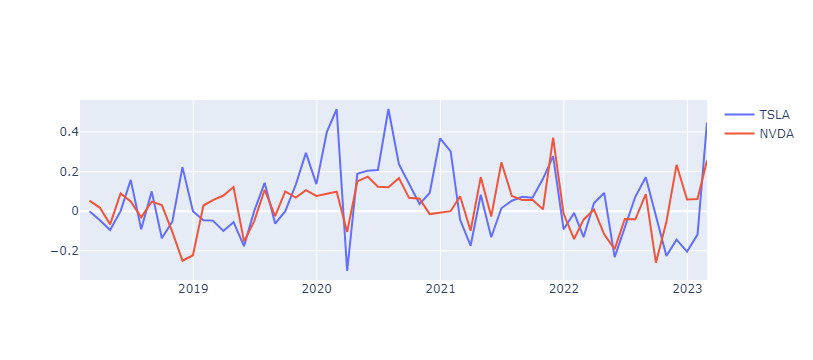

In [28]:
import plotly.graph_objects as go

# Create traces
fig = go.Figure()
fig.add_trace(go.Scatter(x=s1.index, y=s1[s1_ticker],
                    mode='lines',
                    name=s1_ticker))
fig.add_trace(go.Scatter(x=s2.index, y=s2[s2_ticker],
                    mode='lines',
                    name=s2_ticker))
fig.show()

## 복리수익률

In [24]:
changes.head()

,TSLA,NVDA
Date,,
2018-02-28,0.000000,0.053571
2018-03-31,-0.045455,0.016949
2018-04-30,-0.095238,-0.066667
2018-05-31,0.000000,0.089286
2018-06-30,0.157895,0.049180


In [45]:
누적수익률 = (changes + 1).cumprod() -1 # cumprod = 누적곱
누적수익률.tail() # TSLA에 2018년부터 투자했으면 700%정도 올랐을듯..

,TSLA,NVDA
Date,,
2022-10-31,9.136364,1.214286
2022-11-30,7.681818,1.732143
2022-12-31,5.909091,1.892857
2023-01-31,5.090909,2.071429
2023-02-28,7.818182,2.857143


In [47]:
누적수익률.index.min()
누적수익률.index.max()

Timestamp('2023-02-28 00:00:00', freq='M')

In [48]:
year = len(누적수익률.index) / 12

5.083333333333333

In [51]:
# CAGR(연복리수익률)
# (1 + 누적수익률)**(1/투자년도) -1
CAGR = (1 + 누적수익률)**(1/year) -1
CAGR.tail()

,TSLA,NVDA
Date,,
2022-10-31,0.577170,0.169270
2022-11-30,0.529835,0.218623
2022-12-31,0.462622,0.232403
2023-01-31,0.426802,0.247011
2023-02-28,0.534533,0.304160


In [ ]:
# 테이블 형태에서 끝나지말고 그래프로 시각화 하기!(그래야 나도, 다른 사람도 더 이해하기 쉬움!)

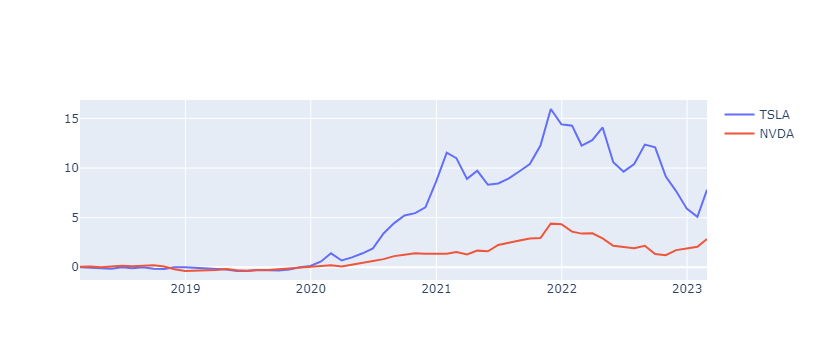

In [27]:
import plotly.graph_objects as go

# Create traces
fig = go.Figure()
fig.add_trace(go.Scatter(x=CAGR.index, y=CAGR[s1_ticker],
                    mode='lines',
                    name=s1_ticker))
fig.add_trace(go.Scatter(x=CAGR.index, y=CAGR[s2_ticker],
                    mode='lines',
                    name=s2_ticker))
fig.show()

## 로그수익률

In [29]:
s1.head()

,Close,TSLA
Date,,
2018-01-31,22,NaN
2018-02-28,22,0.000000
2018-03-31,21,-0.045455
2018-04-30,19,-0.095238
2018-05-31,19,0.000000


In [30]:
s1['LogReturn'] = np.log(s1['Close']) - np.log(s1['Close']).shift(1)
s2['LogReturn'] = np.log(s2['Close']) - np.log(s2['Close']).shift(1)
s1.head()

,Close,TSLA,LogReturn
Date,,,
2018-01-31,22,NaN,NaN
2018-02-28,22,0.000000,0.000000
2018-03-31,21,-0.045455,-0.046520
2018-04-30,19,-0.095238,-0.100083
2018-05-31,19,0.000000,0.000000


In [36]:
s1['Cum_LogReturn'] = s1['LogReturn'].cumsum() # 다 더해주면 로그수익률이 됨(로그에서 + >> x)
s2['Cum_LogReturn'] = s2['LogReturn'].cumsum()
s1['Return'] = (1 + s1[s1_ticker]).cumprod() - 1 # 단리.. 그냥 수익률
s2['Return'] = (1 + s2[s2_ticker]).cumprod() - 1

s1.tail()

,Close,TSLA,LogReturn,Cum_LogReturn,Return
Date,,,,,
2022-10-31,223,-0.225694,-0.255789,2.316129,9.136364
2022-11-30,191,-0.143498,-0.154898,2.161231,7.681818
2022-12-31,152,-0.204188,-0.228393,1.932838,5.909091
2023-01-31,134,-0.118421,-0.126041,1.806797,5.090909
2023-02-28,194,0.447761,0.370018,2.176816,7.818182


## [실습]

In [52]:
samsung = fdr.DataReader('005930', '1998').resample(rule='M').mean().astype(int)[['Close']]

# 변화율
# 복리수익률(누적수익률)
# 로그 수익률
# 누적 로그 수익률

In [53]:
samsung.head()

,Close
Date,
1998-11-30,1243
1998-12-31,1418
1999-01-31,1740
1999-02-28,1680
1999-03-31,1759


In [54]:
# 변화율
samsung['Changes'] = samsung['Close'].pct_change()
samsung.head()

,Close,Changes
Date,,
1998-11-30,1243,NaN
1998-12-31,1418,0.140788
1999-01-31,1740,0.227080
1999-02-28,1680,-0.034483
1999-03-31,1759,0.047024


In [55]:
# 누적수익률
samsung['CumulativeReturn'] = (samsung['Changes'] + 1).cumprod() -1
samsung.head()

,Close,Changes,CumulativeReturn
Date,,,
1998-11-30,1243,NaN,NaN
1998-12-31,1418,0.140788,0.140788
1999-01-31,1740,0.227080,0.399839
1999-02-28,1680,-0.034483,0.351569
1999-03-31,1759,0.047024,0.415125


In [56]:
# 연복리수익률(CAGR)
samsung['CAGR'] = (1 + samsung['CumulativeReturn'])**(1/(len(samsung['CumulativeReturn']) / 12)) -1
samsung.tail()

,Close,Changes,CumulativeReturn,CAGR
Date,,,,
2022-10-31,56710,0.020056,44.623492,0.170000
2022-11-30,61090,0.077235,48.147224,0.173583
2022-12-31,59080,-0.032902,46.530169,0.171970
2023-01-31,60540,0.024712,47.704747,0.173146
2023-02-28,62666,0.035117,49.415125,0.174812


In [57]:
# 로그수익률
samsung['LogReturn'] = np.log(samsung['Close']) - np.log(samsung['Close']).shift(1)
samsung.tail()

,Close,Changes,CumulativeReturn,CAGR,LogReturn
Date,,,,,
2022-10-31,56710,0.020056,44.623492,0.170000,0.019857
2022-11-30,61090,0.077235,48.147224,0.173583,0.074398
2022-12-31,59080,-0.032902,46.530169,0.171970,-0.033456
2023-01-31,60540,0.024712,47.704747,0.173146,0.024412
2023-02-28,62666,0.035117,49.415125,0.174812,0.034515


In [58]:
# 누적 로그수익률
samsung['Cum_LogReturn'] = samsung['LogReturn'].cumsum()

In [59]:
samsung.tail()

,Close,Changes,CumulativeReturn,CAGR,LogReturn,Cum_LogReturn
Date,,,,,,
2022-10-31,56710,0.020056,44.623492,0.170000,0.019857,3.820423
2022-11-30,61090,0.077235,48.147224,0.173583,0.074398,3.894820
2022-12-31,59080,-0.032902,46.530169,0.171970,-0.033456,3.861365
2023-01-31,60540,0.024712,47.704747,0.173146,0.024412,3.885776
2023-02-28,62666,0.035117,49.415125,0.174812,0.034515,3.920291
